In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def grad(X, y, beta):
    
    print("X@beta:", X.T@beta)
    print("y-X@beta", y-X.T@beta)
    
    return -X.T@(y-X.T@beta)


In [15]:
def soft( u, w):
    
    if(u<=-w):
        return u+w
    elif(u>=w):
        return u-w
    else:
        return 0

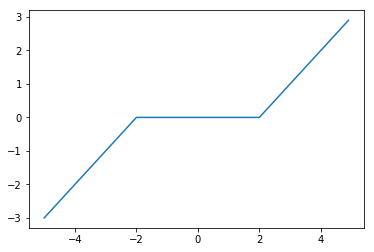

In [16]:
X_test = np.arange(100)/10-5
y_test = [soft(i, 2) for i in X_test]
plt.plot(X_test, y_test)

In [17]:
def update_alpha (theta1, theta2, g1, g2):
    
    return ((theta1-theta2).T@(g1-g2))/((theta1-theta2).T@(theta1-theta2))

In [18]:
def nesterov_update(theta1, theta2,k):
    return theta1 + ((k-1)/(k+2))*(theta1-theta2)

In [19]:
def update_l (X, r, l_):
    print("X@r:", X.T@r)
    print("sX@r:", s*X.T@r)
    return max(list(s*X.T@r)+[l])





In [23]:
X = np.array([[0, 1, 0],
              [0.5, 0.5, 1],
              [1, 0, 0]])
y = r = np.array([[1],
              [0.75],
              [0.5]])
beta = beta1= g1= np.array([[0],
                 [0],
                 [0]])
l = l_ = 0.1
s=0.5
alpha = 1.0

In [24]:
for k in range(1,4):
    print("..................Iteration ",k, "...............")
    l = update_l (X, r, l_)
    print("l:",l)
    print("beta after nest:", beta)

    g = grad(X, y, beta)
    print("g:",g)
   
    u = beta - (1/alpha)*g
    print("u:", u)
    beta = beta1
    beta1 = np.array([float(soft(i, l/alpha)) for i in u]).reshape(-1,1)
    print("beta1:", beta1)
    print("beta:", beta)
    
    alpha = update_alpha(beta1, beta, g, g1)[0][0]
    print("alpha:", alpha)

    
    g1 = g
    r = y - X.T@beta1
    print("r:", r)

..................Iteration  1 ...............
X@r: [[0.875]
 [1.375]
 [0.75 ]]
sX@r: [[0.4375]
 [0.6875]
 [0.375 ]]
l: [0.6875]
beta after nest: [[0]
 [0]
 [0]]
X@beta: [[0.]
 [0.]
 [0.]]
y-X@beta [[1.  ]
 [0.75]
 [0.5 ]]
g: [[-0.875]
 [-1.375]
 [-0.75 ]]
u: [[0.875]
 [1.375]
 [0.75 ]]
beta1: [[0.1875]
 [0.6875]
 [0.0625]]
beta: [[0]
 [0]
 [0]]
alpha: -2.2595419847328246
r: [[ 0.59375]
 [ 0.21875]
 [-0.1875 ]]
..................Iteration  2 ...............
X@r: [[-0.078125]
 [ 0.703125]
 [ 0.21875 ]]
sX@r: [[-0.0390625]
 [ 0.3515625]
 [ 0.109375 ]]
l: [0.6875]
beta after nest: [[0]
 [0]
 [0]]
X@beta: [[0.]
 [0.]
 [0.]]
y-X@beta [[1.  ]
 [0.75]
 [0.5 ]]
g: [[-0.875]
 [-1.375]
 [-0.75 ]]
u: [[-0.38724662]
 [-0.60853041]
 [-0.33192568]]
beta1: [[-0.69151182]
 [-0.91279561]
 [-0.63619088]]
beta: [[0.1875]
 [0.6875]
 [0.0625]]
alpha: 0.0
r: [[2.09258868]
 [1.89790963]
 [1.41279561]]
..................Iteration  3 ...............
X@r: [[2.36175042]
 [3.0415435 ]
 [1.89790963]]
sX@r: [[1.180

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in add
  after removing the cwd from sys.path.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  


In [22]:
for k in range(3):
    print("..................Iteration ",k, "...............")
    l = update_l (X, r, l_)
    print("l:",l)
    g = grad(X, y, beta)
    print("g:",g)
   
    u = beta - (1/alpha)*g
    print("u:", u)
    beta1 = np.array([float(soft(i, l/alpha)) for i in u]).reshape(-1,1)
    print("beta1:", beta1)
    print("beta:", beta)
    
    alpha = update_alpha(beta1, beta, g, g1)[0][0]
    print("alpha:", alpha)

    beta = beta1
    g1 = g
    r = y - X@beta
    print("r:", r)

..................Iteration  0 ...............
X@r: [[2.36175042]
 [3.0415435 ]
 [1.89790963]]
sX@r: [[1.18087521]
 [1.52077175]
 [0.94895481]]
l: [1.52077175]
X@beta: [[0.40625]
 [0.53125]
 [0.6875 ]]
y-X@beta [[ 0.59375]
 [ 0.21875]
 [-0.1875 ]]
g: [[ 0.078125]
 [-0.703125]
 [-0.21875 ]]
u: [[-inf]
 [ inf]
 [ inf]]
beta1: [[nan]
 [nan]
 [nan]]
beta: [[0.1875]
 [0.6875]
 [0.0625]]
alpha: nan
r: [[nan]
 [nan]
 [nan]]
..................Iteration  1 ...............
X@r: [[nan]
 [nan]
 [nan]]
sX@r: [[nan]
 [nan]
 [nan]]
l: [nan]
X@beta: [[nan]
 [nan]
 [nan]]
y-X@beta [[nan]
 [nan]
 [nan]]
g: [[nan]
 [nan]
 [nan]]
u: [[nan]
 [nan]
 [nan]]
beta1: [[0.]
 [0.]
 [0.]]
beta: [[nan]
 [nan]
 [nan]]
alpha: nan
r: [[1.  ]
 [0.75]
 [0.5 ]]
..................Iteration  2 ...............
X@r: [[0.875]
 [1.375]
 [0.75 ]]
sX@r: [[0.4375]
 [0.6875]
 [0.375 ]]
l: [0.6875]
X@beta: [[0.]
 [0.]
 [0.]]
y-X@beta [[1.  ]
 [0.75]
 [0.5 ]]
g: [[-0.875]
 [-1.375]
 [-0.75 ]]
u: [[nan]
 [nan]
 [nan]]
beta1: [[0.]
 [

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in add
  after removing the cwd from sys.path.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less_equal
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ip